Import Necessary Libraries

In [17]:
import requests
import pandas as pd
import time


Define the OMDb API Key and Base URL

API_KEY – This is the authentication key required to access the OMDb API.
BASE_URL – This is the endpoint of the OMDb API, where requests are sent

In [18]:
API_KEY = "b7b3206a"
BASE_URL = "http://www.omdbapi.com/"


Create a List of 50 Movie Titles

The script fetches details for 50 movies.
These movies include a mix of classics, blockbusters, and recent hits.
The list can be expanded or modified if needed

In [19]:
movie_titles = [
    "Inception", "The Dark Knight", "Interstellar", "Titanic", "The Matrix",
    "Avatar", "Gladiator", "Joker", "Forrest Gump", "The Shawshank Redemption",
    "The Godfather", "Pulp Fiction", "Fight Club", "The Lord of the Rings: The Return of the King",
    "The Silence of the Lambs", "Schindler's List", "The Departed", "The Wolf of Wall Street",
    "The Prestige", "Django Unchained", "The Green Mile", "Saving Private Ryan", "The Lion King",
    "Braveheart", "Black Panther", "Spider-Man: No Way Home", "The Avengers", "Avengers: Endgame",
    "Avengers: Infinity War", "Iron Man", "Doctor Strange", "Guardians of the Galaxy",
    "Thor: Ragnarok", "Captain America: The Winter Soldier", "Deadpool", "Logan", "The Batman",
    "The Irishman", "Once Upon a Time in Hollywood", "Whiplash", "La La Land", "Parasite",
    "1917", "Mad Max: Fury Road", "A Star is Born", "Bohemian Rhapsody", "Shutter Island",
    "The Revenant", "The Social Network", "Goodfellas", "The Grand Budapest Hotel"
]


Define a Function to Fetch Movie Data

The function takes a movie title as input.
It sends a request to the OMDb API using requests.get(), passing:
apikey: The API key for authentication.
t: The movie title to search for.
If the response status is 200 (successful request):
The API returns JSON data.
The function extracts key details (e.g., Title, Genre, Director, IMDb Rating, etc.).
It returns the movie details as a dictionary.
If the movie is not found (Response = False), it returns None.

In [20]:
def fetch_movie_data(title):
    response = requests.get(BASE_URL, params={"apikey": API_KEY, "t": title})
    
    if response.status_code == 200:
        data = response.json()
        
        if data.get("Response") == "True":
            return {
                "Title": data.get("Title"),
                "Genre": data.get("Genre"),
                "Director": data.get("Director"),
                "Cast": data.get("Actors"),
                "Year": data.get("Year"),
                "IMDb Rating": data.get("imdbRating"),
                "Runtime": data.get("Runtime"),
                "Plot": data.get("Plot"),
                "Box Office": data.get("BoxOffice"),
                "Awards": data.get("Awards"),
            }
    return None


Loop Through Movie Titles and Fetch Data

Creates an empty list movies_data to store fetched movie details.
Loops through each movie in movie_titles:
Calls fetch_movie_data(title) for each movie.
Prints a status message (Fetching details for: movie_name).
If the movie data is found, it is added to movies_data.
Uses time.sleep(1) to wait 1 second between API calls (prevents exceeding OMDb’s rate limits).

In [21]:
movies_data = []

for title in movie_titles:
    print(f"Fetching details for: {title}")
    movie_data = fetch_movie_data(title)
    
    if movie_data:
        movies_data.append(movie_data)
    
    time.sleep(1)  # Delay to avoid exceeding API limits


Fetching details for: Inception
Fetching details for: The Dark Knight
Fetching details for: Interstellar
Fetching details for: Titanic
Fetching details for: The Matrix
Fetching details for: Avatar
Fetching details for: Gladiator
Fetching details for: Joker
Fetching details for: Forrest Gump
Fetching details for: The Shawshank Redemption
Fetching details for: The Godfather
Fetching details for: Pulp Fiction
Fetching details for: Fight Club
Fetching details for: The Lord of the Rings: The Return of the King
Fetching details for: The Silence of the Lambs
Fetching details for: Schindler's List
Fetching details for: The Departed
Fetching details for: The Wolf of Wall Street
Fetching details for: The Prestige
Fetching details for: Django Unchained
Fetching details for: The Green Mile
Fetching details for: Saving Private Ryan
Fetching details for: The Lion King
Fetching details for: Braveheart
Fetching details for: Black Panther
Fetching details for: Spider-Man: No Way Home
Fetching details f

Convert Data into a Pandas DataFrame

Converts the list of dictionaries (movies_data) into a Pandas DataFrame.
A DataFrame is like a table (Excel-style) where:
Each row is a movie.
Each column is a movie attribute (Title, Director, Genre, etc.).

In [22]:
df = pd.DataFrame(movies_data)


 Save the Data to a CSV File

 Defines a CSV filename (Group1_movies.csv).
Saves the DataFrame as a CSV file using to_csv().
index=False ensures that row numbers are not included in the file.
Prints a confirmation message (✅ CSV file created successfully!).

In [23]:
csv_filename = "Group1_movies.csv"  # Replace 'YourLastName' with your actual last name
df.to_csv(csv_filename, index=False)

print(f"✅ CSV file '{csv_filename}' created successfully!")


✅ CSV file 'Group1_movies.csv' created successfully!


In [24]:
##viewing the dataset
df

,Title,Genre,Director,Cast,Year,IMDb Rating,Runtime,Plot,Box Office,Awards
0,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,8.8,148 min,A thief who steals corporate secrets through t...,"$292,587,330",Won 4 Oscars. 159 wins & 220 nominations total
1,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",2008,9.0,152 min,When a menace known as the Joker wreaks havoc ...,"$534,987,076",Won 2 Oscars. 164 wins & 165 nominations total
2,Interstellar,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,8.7,169 min,When Earth becomes uninhabitable in the future...,"$203,227,580",Won 1 Oscar. 44 wins & 148 nominations total
3,Titanic,"Drama, Romance",James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane",1997,7.9,194 min,A seventeen-year-old aristocrat falls in love ...,"$674,292,608",Won 11 Oscars. 126 wins & 83 nominations total
4,The Matrix,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",1999,8.7,136 min,When a beautiful stranger leads computer hacke...,"$172,076,928",Won 4 Oscars. 42 wins & 52 nominations total
5,Avatar,"Action, Adventure, Fantasy",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver",2009,7.9,162 min,A paraplegic Marine dispatched to the moon Pan...,"$785,221,649",Won 3 Oscars. 91 wins & 131 nominations total
6,Gladiator,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",2000,8.5,155 min,A former Roman General sets out to exact venge...,"$187,705,427",Won 5 Oscars. 60 wins & 104 nominations total
7,Joker,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz",2019,8.3,122 min,"Arthur Fleck, a party clown and a failed stand...","$335,477,657",Won 2 Oscars. 121 wins & 247 nominations total
8,Forrest Gump,"Drama, Romance",Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise",1994,8.8,142 min,The history of the United States from the 1950...,"$330,455,270",Won 6 Oscars. 51 wins & 74 nominations total
9,The Shawshank Redemption,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",1994,9.3,142 min,A banker convicted of uxoricide forms a friend...,"$28,767,189",Nominated for 7 Oscars. 21 wins & 42 nominatio...


Load and Inspect the Dataset

First, we load the scraped dataset using Pandas and check the first few rows to understand its structure.

In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Group1_movies.csv")  

# Display the first few rows
print(df.head())


             Title                      Genre  \
0        Inception  Action, Adventure, Sci-Fi   
1  The Dark Knight       Action, Crime, Drama   
2     Interstellar   Adventure, Drama, Sci-Fi   
3          Titanic             Drama, Romance   
4       The Matrix             Action, Sci-Fi   

                          Director  \
0                Christopher Nolan   
1                Christopher Nolan   
2                Christopher Nolan   
3                    James Cameron   
4  Lana Wachowski, Lilly Wachowski   

                                                Cast  Year  IMDb Rating  \
0  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...  2010          8.8   
1        Christian Bale, Heath Ledger, Aaron Eckhart  2008          9.0   
2  Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014          8.7   
3        Leonardo DiCaprio, Kate Winslet, Billy Zane  1997          7.9   
4  Keanu Reeves, Laurence Fishburne, Carrie-Anne ...  1999          8.7   

   Runtime               

Identify the Most Common Movie Genres

The "Genre" column contains multiple genres separated by commas (e.g., "Action, Adventure").

We split them into individual genres and count how many times each genre appears.

We sort the genres by frequency and display the top 5.

In [26]:
from collections import Counter

# Split genres and count occurrences
genre_list = []
for genres in df["Genre"].dropna():  # Drop missing values
    genre_list.extend(genres.split(", "))  # Split multiple genres in a movie

# Count occurrences
genre_counts = Counter(genre_list)

# Convert to DataFrame and sort
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

print("Most Common Movie Genres:")
print(genre_df.head(5))  # Show top 5 genres


Most Common Movie Genres:
       Genre  Count
4      Drama     34
0     Action     21
1  Adventure     18
2     Sci-Fi     12
3      Crime     12


Calculate the Average IMDb Rating

Converts IMDb ratings to numeric format (in case they were stored as text).

Uses .mean() to calculate the average rating.

Prints the final value.

In [27]:
# Convert IMDb Rating to numeric (handle missing values)
df["IMDb Rating"] = pd.to_numeric(df["IMDb Rating"], errors="coerce")

# Calculate the average rating
average_rating = df["IMDb Rating"].mean()

print(f" The average IMDb Rating is: {average_rating:.2f}")


 The average IMDb Rating is: 8.31


Identify Trends and Patterns



IMDb Ratings by Genre

"We visualized IMDb ratings by genre and noticed that some genres consistently have higher ratings than others."

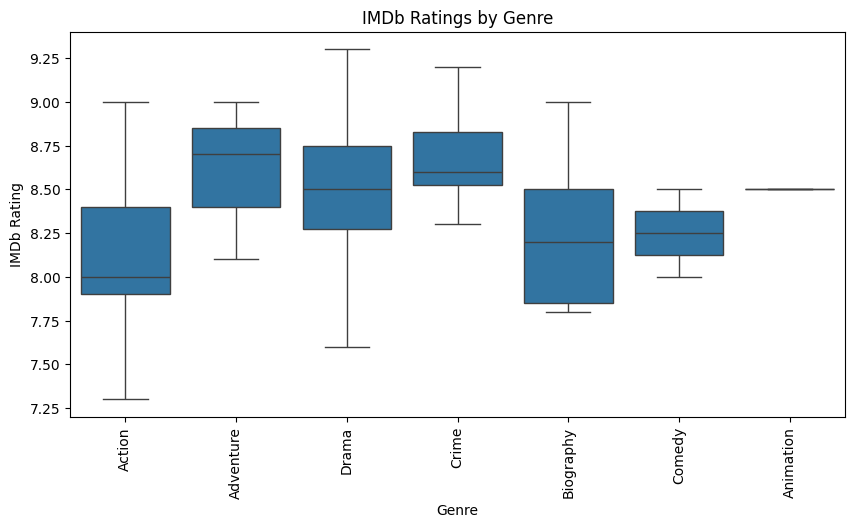

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Genre"].str.split(", ").str[0], y=df["IMDb Rating"])
plt.xticks(rotation=90)
plt.title("IMDb Ratings by Genre")
plt.show()


Relationship Between Year and IMDb Rating

We plotted movie release years against IMDb ratings to see if older movies tend to have higher ratings

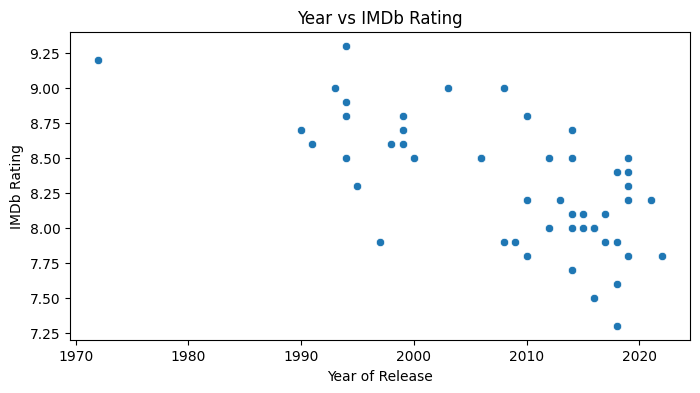

In [29]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

plt.figure(figsize=(8, 4))
sns.scatterplot(x=df["Year"], y=df["IMDb Rating"])
plt.title("Year vs IMDb Rating")
plt.xlabel("Year of Release")
plt.ylabel("IMDb Rating")
plt.show()


Find Correlations

We check if certain factors (like runtime, box office earnings) affect IMDb ratings.

corr() finds correlation values (closer to 1 or -1 means a strong relationship).

The output tells us which factor influences IMDb ratings the most.

"We calculated correlations to determine if factors like runtime or box office earnings impact IMDb ratings."

In [30]:
import pandas as pd
import numpy as np

# Check if "Box Office" column exists
if "Box Office" not in df.columns:
    raise KeyError("🚨 The 'Box Office' column is missing in the DataFrame!")

if "Runtime" not in df.columns:
    raise KeyError("🚨 The 'Runtime' column is missing in the DataFrame!")

# Ensure "Box Office" is a string and clean the data
df["Box Office"] = df["Box Office"].astype(str).str.replace(r"[$,]", "", regex=True)
df["Box Office"] = pd.to_numeric(df["Box Office"], errors="coerce")  # Convert to numeric

# Ensure "Runtime" is a string and clean the data
df["Runtime"] = df["Runtime"].astype(str).str.replace(" min", "", regex=False)
df["Runtime"] = pd.to_numeric(df["Runtime"], errors="coerce")  # Convert to numeric

# Check if any invalid values remain
print("✅ 'Box Office' data type:", df["Box Office"].dtype)
print("✅ 'Runtime' data type:", df["Runtime"].dtype)

# Select numeric columns
numeric_columns = ["IMDb Rating", "Year", "Runtime", "Box Office"]
df_numeric = df[numeric_columns].dropna()

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

print("🔎 Correlation with IMDb Rating:")
print(correlation_matrix["IMDb Rating"].sort_values(ascending=False))


✅ 'Box Office' data type: float64
✅ 'Runtime' data type: float64
🔎 Correlation with IMDb Rating:
IMDb Rating    1.000000
Runtime        0.321830
Box Office    -0.300152
Year          -0.654216
Name: IMDb Rating, dtype: float64


Visualize Correlations

A heatmap shows the strength of relationships between different parameters.

Darker colors = stronger correlation.

"We used a heatmap to visualize the strength of correlations between IMDb ratings and other movie parameters."

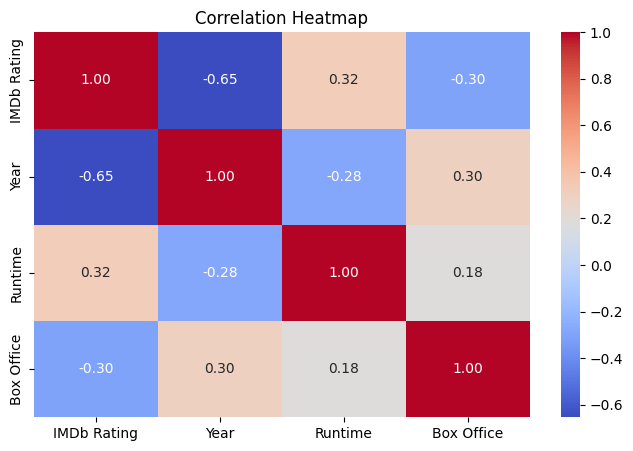

In [31]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
